# Insurance Data Analysis

### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
import os


In [2]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning)

In [3]:
sys.path.append(os.path.abspath('../scripts'))
from Utils import DataUtils
from plotting import Plotting

In [4]:
data = pd.read_csv('../data/MachineLearningRating_v3.txt', sep = '|')


C:\Users\user\AppData\Local\Temp\ipykernel_10772\3731394490.py:1: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('../data/MachineLearningRating_v3.txt', sep = '|')


In [ ]:
data.to_csv('../data/dataset.csv')

In [5]:
data_utils =DataUtils (data)
plotting = Plotting(data)

### Data Summarization


In [6]:
data.describe()

,UnderwrittenCoverID,PolicyID,PostalCode,mmcode,RegistrationYear,Cylinders,cubiccapacity,kilowatts,NumberOfDoors,CustomValueEstimate,NumberOfVehiclesInFleet,SumInsured,CalculatedPremiumPerTerm,TotalPremium,TotalClaims
count,1.000098e+06,1.000098e+06,1.000098e+06,9.995460e+05,1.000098e+06,999546.000000,999546.000000,999546.000000,999546.000000,2.204560e+05,0.0,1.000098e+06,1.000098e+06,1.000098e+06,1.000098e+06
mean,1.048175e+05,7.956682e+03,3.020601e+03,5.487770e+07,2.010225e+03,4.046642,2466.743258,97.207919,4.019250,2.255311e+05,NaN,6.041727e+05,1.178757e+02,6.190550e+01,6.486119e+01
std,6.329371e+04,5.290039e+03,2.649854e+03,1.360381e+07,3.261391e+00,0.294020,442.800640,19.393256,0.468314,5.645157e+05,NaN,1.508332e+06,3.997017e+02,2.302845e+02,2.384075e+03
min,1.000000e+00,1.400000e+01,1.000000e+00,4.041200e+06,1.987000e+03,0.000000,0.000000,0.000000,0.000000,2.000000e+04,NaN,1.000000e-02,0.000000e+00,-7.825768e+02,-1.200241e+04
25%,5.514300e+04,4.500000e+03,8.270000e+02,6.005692e+07,2.008000e+03,4.000000,2237.000000,75.000000,4.000000,1.350000e+05,NaN,5.000000e+03,3.224800e+00,0.000000e+00,0.000000e+00
50%,9.408300e+04,7.071000e+03,2.000000e+03,6.005842e+07,2.011000e+03,4.000000,2694.000000,111.000000,4.000000,2.200000e+05,NaN,7.500000e+03,8.436900e+00,2.178333e+00,0.000000e+00
75%,1.391900e+05,1.107700e+04,4.180000e+03,6.005842e+07,2.013000e+03,4.000000,2694.000000,111.000000,4.000000,2.800000e+05,NaN,2.500000e+05,9.000000e+01,2.192982e+01,0.000000e+00
max,3.011750e+05,2.324600e+04,9.870000e+03,6.506535e+07,2.015000e+03,10.000000,12880.000000,309.000000,6.000000,2.655000e+07,NaN,1.263620e+07,7.442217e+04,6.528260e+04,3.930921e+05


In [7]:
# The variability of each columns
data.describe()[data.describe().index == 'std'].T.sort_values(by = 'std', ascending=False)

,std
mmcode,1.360381e+07
SumInsured,1.508332e+06
CustomValueEstimate,5.645157e+05
UnderwrittenCoverID,6.329371e+04
PolicyID,5.290039e+03
PostalCode,2.649854e+03
TotalClaims,2.384075e+03
cubiccapacity,4.428006e+02
CalculatedPremiumPerTerm,3.997017e+02
TotalPremium,2.302845e+02


#### Check if the data types are correct

In [8]:
data.dtypes.value_counts()

object     36
float64    11
int64       4
bool        1
Name: count, dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

#### Columns to Bool

In [10]:
# Changing WrittenOff to Bool 
data ['WrittenOff'] = data['WrittenOff'].apply(lambda x: True if x == 'Yes' else (False if x == 'No' else None))

In [11]:
# Changing NewVehicle to Bool 
data ['NewVehicle'] = data['NewVehicle'].apply(lambda x: True if x == 'More than 6 months' else (False if x == 'Less than 6 months' else None))

In [12]:
# Changing AlarmImmobiliser to Bool 
data ['AlarmImmobiliser'] = data['AlarmImmobiliser'].apply(lambda x: True if x == 'Yes' else (False if x == 'No' else None))

In [13]:
# Changing TrackingDevice to Bool 
data['TrackingDevice'] = data['TrackingDevice'].apply(lambda x: True if x == 'Yes' else (False if x == 'No' else None))

In [14]:
# Changing Rebuilt column bool
data['Rebuilt'] = data['Rebuilt'].apply(lambda x: True if x == 'Yes' else(False if x == 'No' else None))

In [15]:
# Changing Converted column to bool
data['Converted'] = data['Converted'].apply(lambda x: True if x == 'Yes' else(False if x == 'No' else None))

In [16]:
# Changing the CrossBorder Column to bool
data['CrossBorder'] = data['CrossBorder'].apply(lambda x: True if x == 'Yes' else(False if x == 'No' else None))

#### Changing to Int

In [17]:
data['NumberOfDoors'] = data['NumberOfDoors'].astype('Int64')
data['Cylinders'] = data['Cylinders'].astype('Int64')
data['mmcode'] = data['mmcode'].astype('Int64')
data['UnderwrittenCoverID'] = data['UnderwrittenCoverID'].astype('Int64')
data['PolicyID'] = data['PolicyID'].astype('Int64')
data['PostalCode'] = data['PostalCode'].astype('Int64')
data['RegistrationYear'] = data['RegistrationYear'].astype('Int64')
data['cubiccapacity'] = data['cubiccapacity'].astype('Int64')
data['kilowatts'] = data['kilowatts'].astype('Int64')


##### Columns to Float

In [18]:
data['CapitalOutstanding'].value_counts().head()

CapitalOutstanding
0         665918
0         122199
0.00        4663
232500      3285
329500      3244
Name: count, dtype: int64

In [19]:
print(data['CapitalOutstanding'].dtypes)

object


In [20]:
# Changing CapitalOutstanding to float
data.CapitalOutstanding = data.CapitalOutstanding.apply(lambda x: float(x.replace(',', '')) if isinstance(x, str) else x )
print(data['CapitalOutstanding'].dtypes)

float64


##### Columns to datetime

In [21]:
# changing the columns to datetime
data['TransactionMonth'].value_counts().head(3)

TransactionMonth
2015-08-01 00:00:00    106747
2015-07-01 00:00:00    104143
2015-06-01 00:00:00    102594
Name: count, dtype: int64

In [22]:
data['TransactionMonth'] = pd.to_datetime(data['TransactionMonth'])
print(data['TransactionMonth'].dtypes)

datetime64[ns]


In [23]:
# changing the columns to datetime
data['VehicleIntroDate'] = pd.to_datetime(data['VehicleIntroDate'], errors='coerce')
print(data['VehicleIntroDate'].dtypes)

datetime64[ns]


### Data Quality Assessment

In [24]:
data_utils.data_info()

**The data contains `1000098` rows and `52` columns.**

**The data has `22` missing columns.**

**The column with the maximum number of missing values is `['NumberOfVehiclesInFleet']`.**

**Columns with more than 50% missing values are:**
- `NumberOfVehiclesInFleet`
- `CrossBorder`
- `CustomValueEstimate`
- `WrittenOff`
- `Converted`
- `Rebuilt`


,Missing values,Missing Percentage,Dtypes
NumberOfVehiclesInFleet,1000098,100.000000,float64
CrossBorder,999400,99.930207,object
CustomValueEstimate,779642,77.956560,float64
WrittenOff,641901,64.183810,object
Converted,641901,64.183810,object
Rebuilt,641901,64.183810,object
NewVehicle,153295,15.327998,object
Bank,145961,14.594670,object
AccountType,40232,4.022806,object
Gender,9536,0.953507,object


#### Plot of missing values

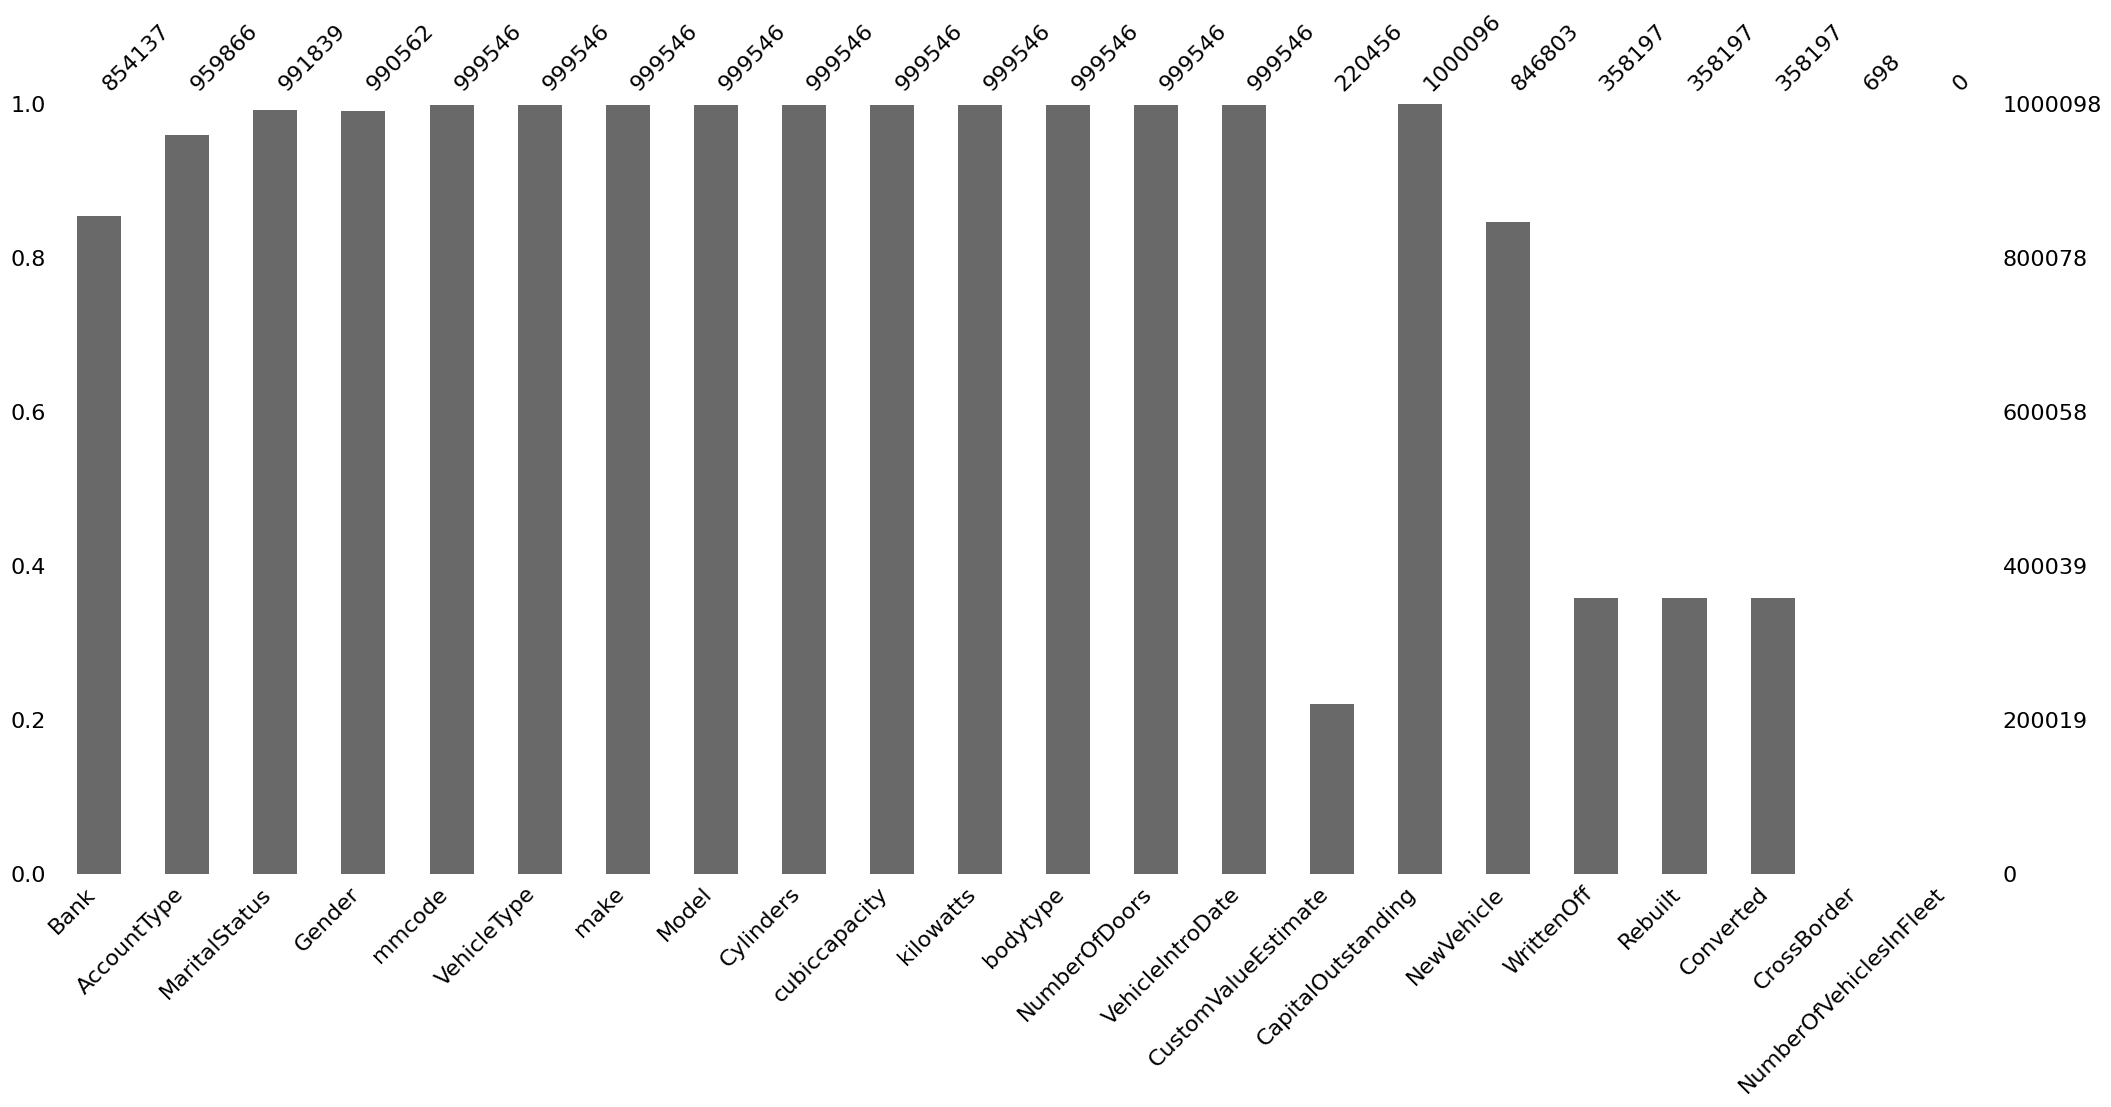

In [32]:
data_utils.visualize_missing_values()

In [25]:
# handling numerical missing values
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols].isna().sum()

UnderwrittenCoverID               0
PolicyID                          0
PostalCode                        0
mmcode                          552
RegistrationYear                  0
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
NumberOfDoors                   552
CustomValueEstimate          779642
CapitalOutstanding                2
NumberOfVehiclesInFleet     1000098
SumInsured                        0
CalculatedPremiumPerTerm          0
TotalPremium                      0
TotalClaims                       0
dtype: int64

In [26]:
data[data['Cylinders'].isna()][['Cylinders', 'kilowatts', 'cubiccapacity', 'mmcode', 'NumberOfDoors']]

,Cylinders,kilowatts,cubiccapacity,mmcode,NumberOfDoors
487033,<NA>,<NA>,<NA>,<NA>,<NA>
512140,<NA>,<NA>,<NA>,<NA>,<NA>
512141,<NA>,<NA>,<NA>,<NA>,<NA>
512142,<NA>,<NA>,<NA>,<NA>,<NA>
512143,<NA>,<NA>,<NA>,<NA>,<NA>
...,...,...,...,...,...
936561,<NA>,<NA>,<NA>,<NA>,<NA>
936562,<NA>,<NA>,<NA>,<NA>,<NA>
936563,<NA>,<NA>,<NA>,<NA>,<NA>
936564,<NA>,<NA>,<NA>,<NA>,<NA>


**Observation**
- As we can see these rows don't contain any data for the columns so it is wise to drop them.

In [27]:
data.dropna(subset=['Cylinders', 'kilowatts', 'cubiccapacity', 'mmcode', 'NumberOfDoors'], inplace=True)

In [28]:
# All the columns are null values so we drop the column
data.drop('NumberOfVehiclesInFleet', axis=1, inplace=True)

In [29]:
# Fill CapitalOutstanding with zero because CapitalOutstanding refering to the remaining amount of capital the insurance should pay
data['CapitalOutstanding'] = data['CapitalOutstanding'].fillna(0)

In [30]:
mean = data['CustomValueEstimate'].mean()
data['CustomValueEstimate'] = data['CustomValueEstimate'].fillna(mean)

In [31]:
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_cols].isna().sum()

UnderwrittenCoverID         0
PolicyID                    0
PostalCode                  0
mmcode                      0
RegistrationYear            0
Cylinders                   0
cubiccapacity               0
kilowatts                   0
NumberOfDoors               0
CustomValueEstimate         0
CapitalOutstanding          0
SumInsured                  0
CalculatedPremiumPerTerm    0
TotalPremium                0
TotalClaims                 0
dtype: int64

In [90]:
# Numerical columns cleaned and dtypes sorted
data.to_csv('../data/dataset.csv')

In [32]:
cat_cols = data.select_dtypes(exclude=['int64', 'float64', 'datetime64[ns]']).columns
data[cat_cols].isna().sum().loc[data[cat_cols].isna().sum() > 0 ]

Bank             145961
AccountType       40232
MaritalStatus      8259
Gender             9536
NewVehicle       153295
WrittenOff       641349
Rebuilt          641349
Converted        641349
CrossBorder      998848
dtype: int64

In [33]:
# fill AccountType with the mode
mode = data['AccountType'].mode()[0]
data['AccountType'] = data['AccountType'].fillna(mode)

In [34]:
data['Gender'] = data['Title'].apply(data_utils.determine_gender)

In [35]:
mode = data['Gender'].mode()[0]
data['Gender'] = data['Gender'].fillna(mode)

In [36]:
data['MaritalStatus'] = data['Title'].apply(data_utils.determine_marriage)

In [37]:
data['MaritalStatus'].isna().sum() # for the rest of missing values no assumtions can be made

np.int64(947082)

In [38]:
data['NewVehicle'] = data['RegistrationYear'].apply(lambda x: False if x < 2014 else True)

In [39]:
mode = data['Bank'].mode()[0]
data['Bank'] = data['Bank'].fillna(mode)

In [40]:
data[cat_cols].isna().sum().loc[data[cat_cols].isna().sum() > 0 ] # for the rest of missing values no assumtions can be made

MaritalStatus    947082
WrittenOff       641349
Rebuilt          641349
Converted        641349
CrossBorder      998848
dtype: int64

In [41]:
# Categorical columns cleaned with some exceptions
data.to_csv('../data/dataset.csv')

#### Univariate Analysis

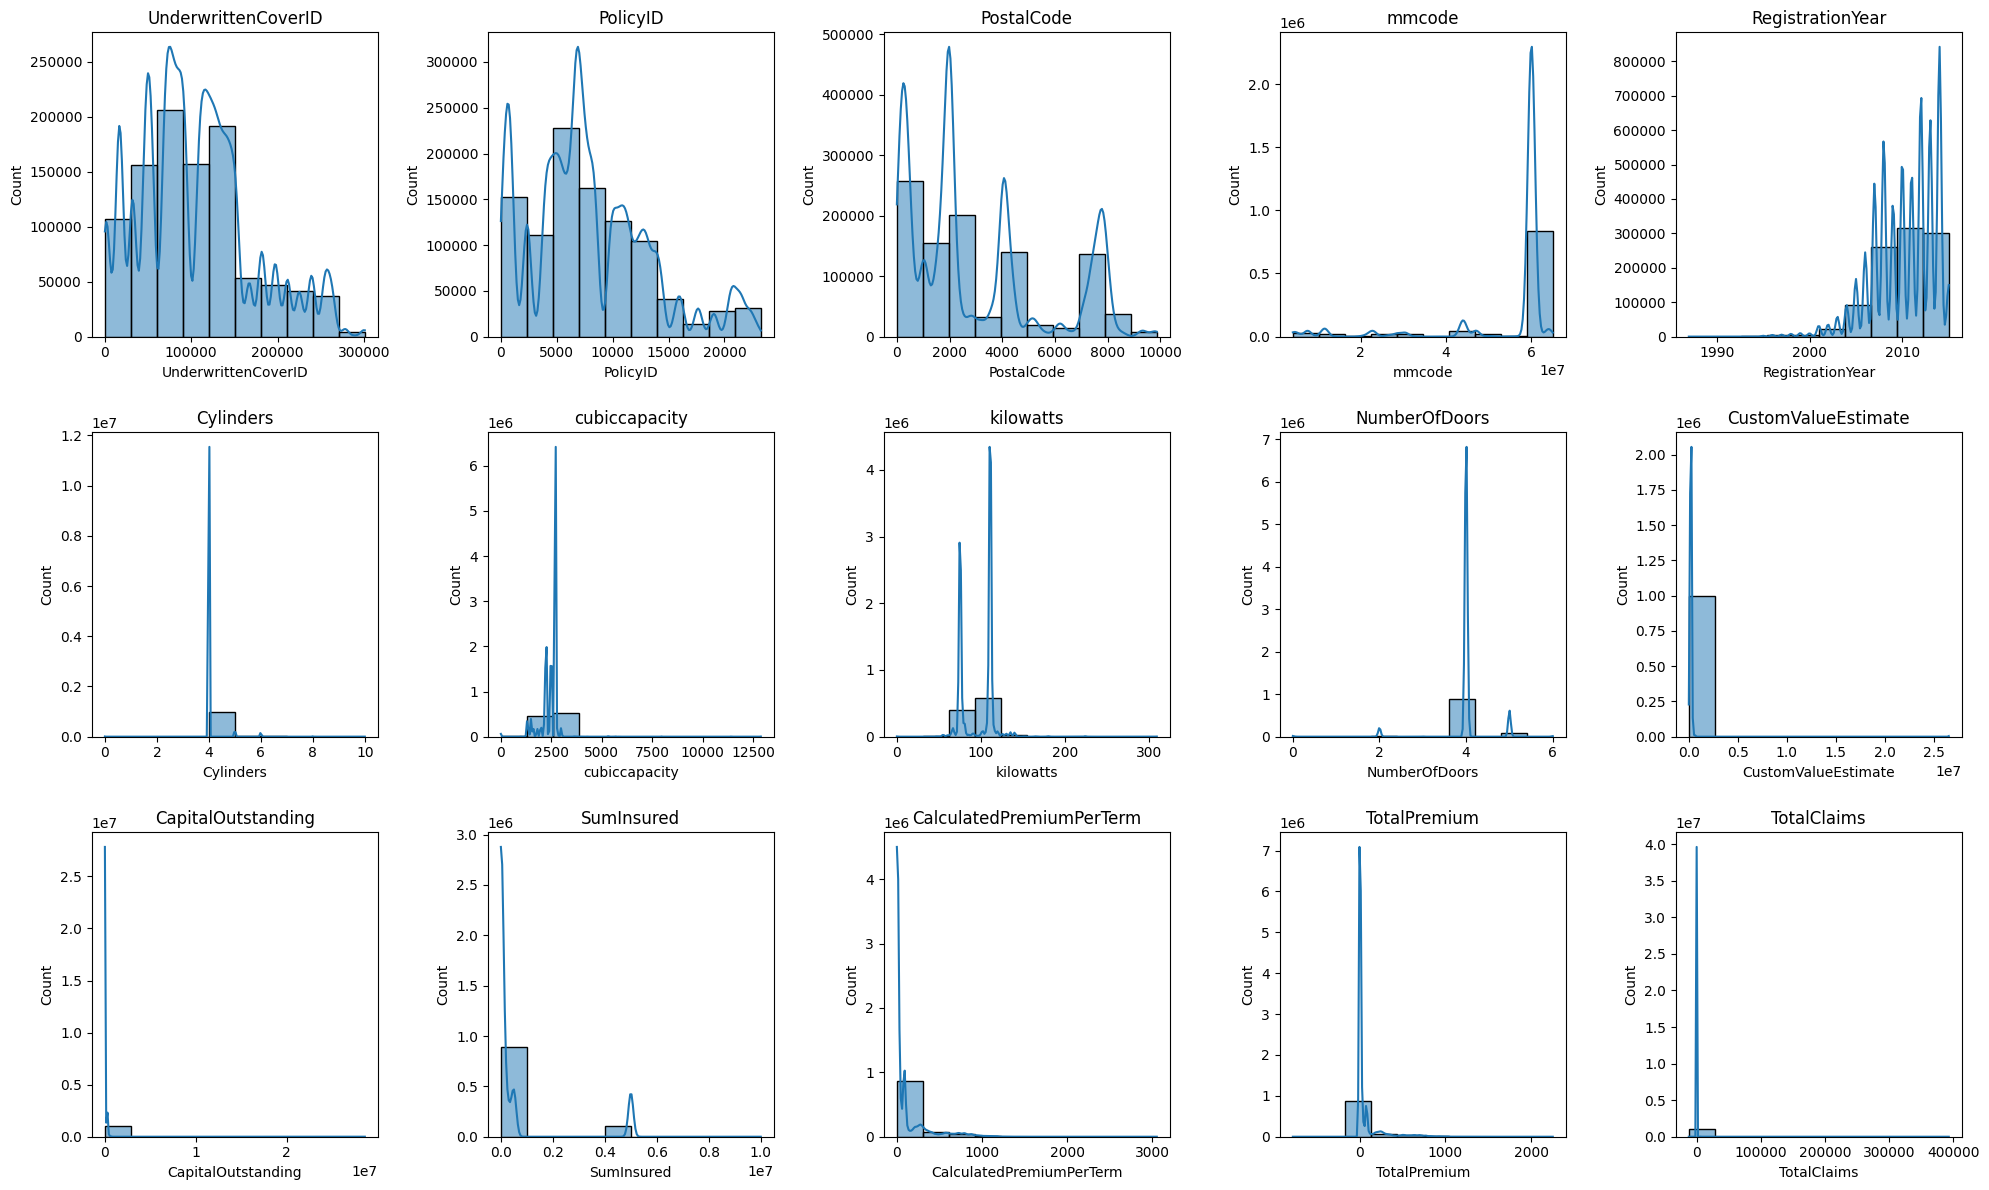

In [42]:
# Numerical column univariant analysis
data_utils.num_univariant_visualization()

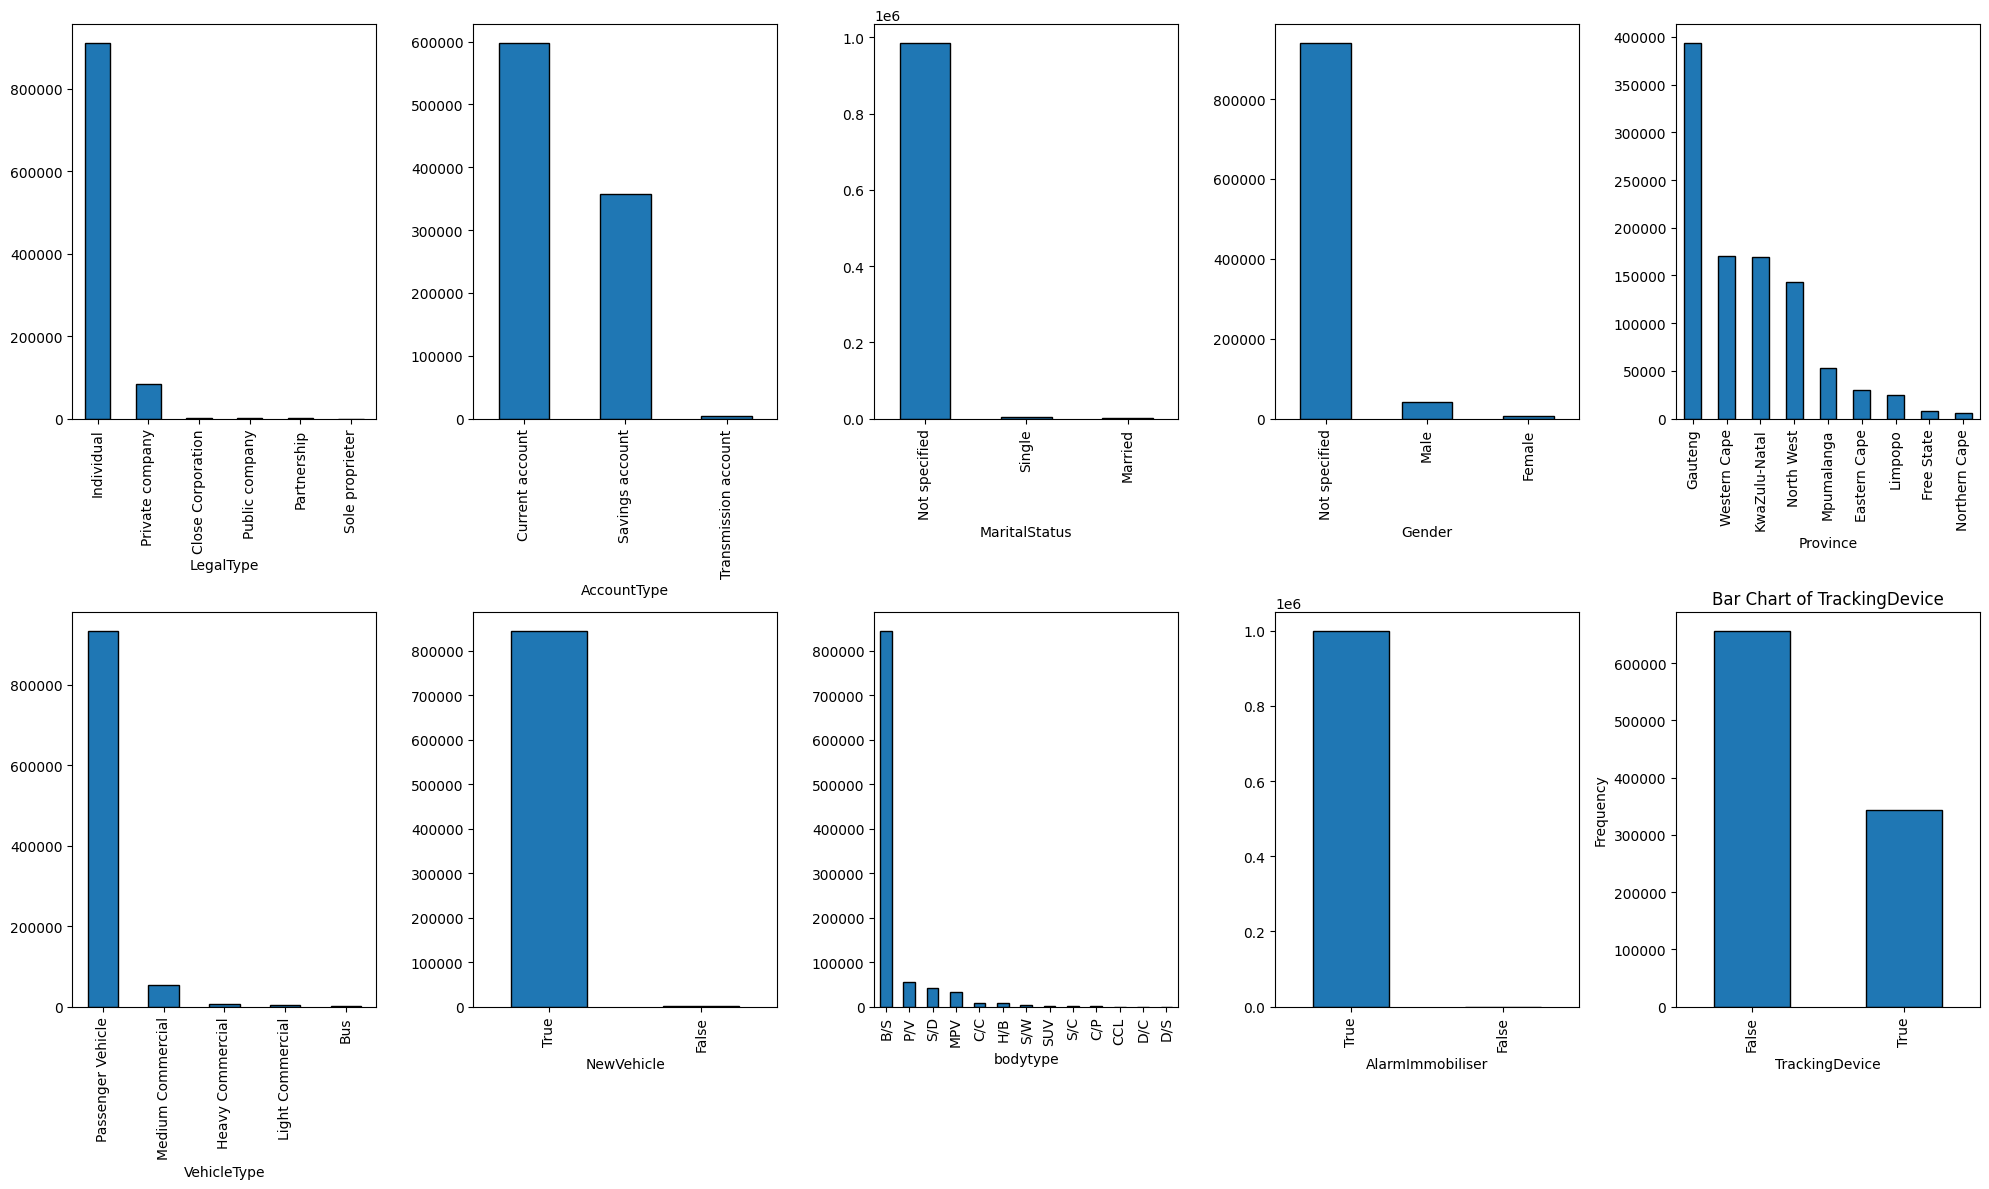

In [64]:
cols = ['LegalType', 'AccountType', 'MaritalStatus', 'Gender', 'Province', 'VehicleType',
        'NewVehicle', 'bodytype', 'AlarmImmobiliser', 'TrackingDevice']

data_utils.cat_univariant_visualization(data, cols)

#### Bivariate Analysis

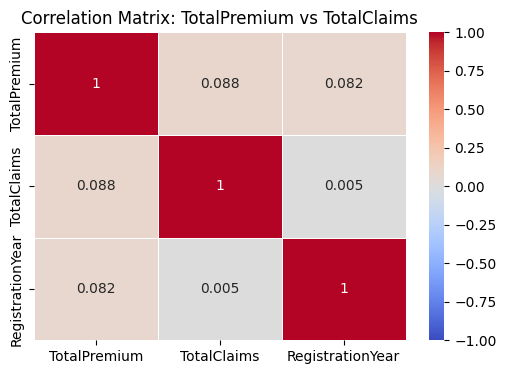

In [100]:
corr_matrix = data[['TotalPremium', 'TotalClaims', 'RegistrationYear']].corr()


plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix: TotalPremium vs TotalClaims')
plt.show()

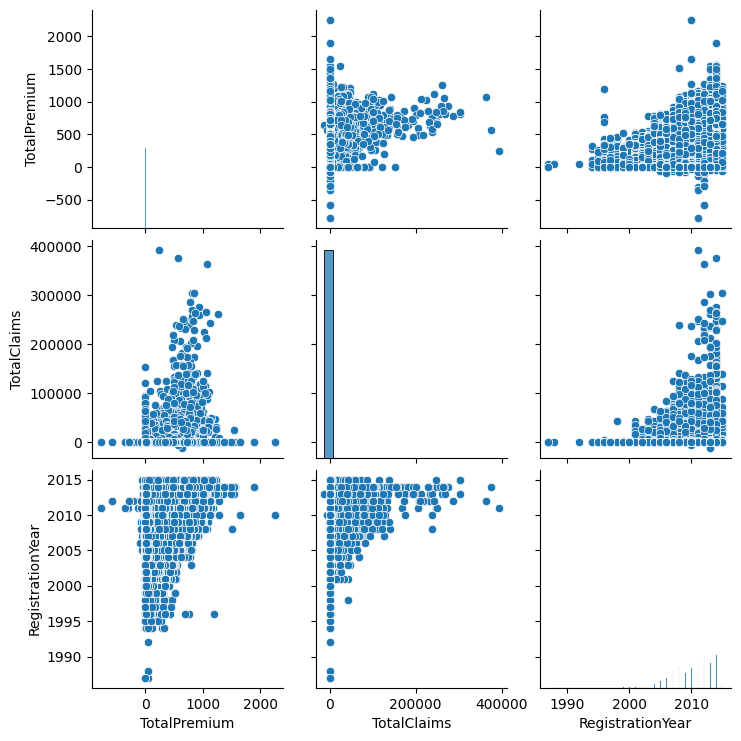

In [50]:
sns.pairplot(data[['TotalPremium', 'TotalClaims', 'RegistrationYear']])
plt.show()

#### Data Comparison

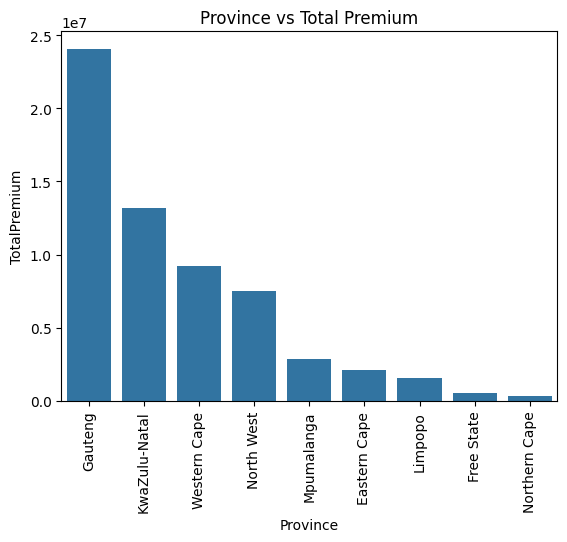

In [42]:
# TotalPremium per province
sns.barplot(data.groupby(by='Province')['TotalPremium'].sum().sort_values(ascending=False))
plt.title('Province vs Total Premium')
plt.xticks(rotation=90);

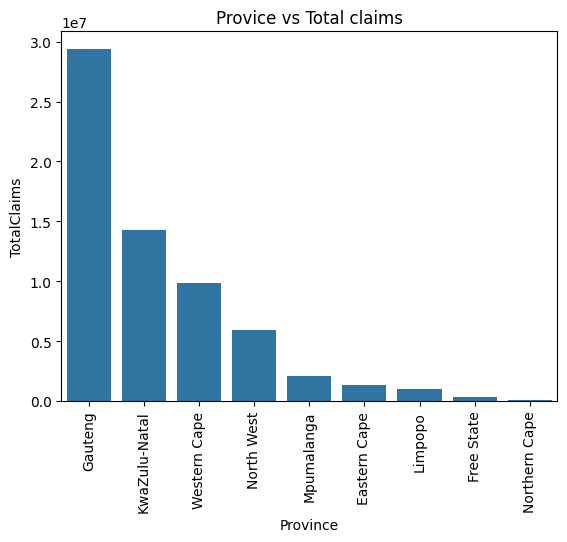

In [41]:
# TotalClaims per province
sns.barplot(data.groupby(by='Province')['TotalClaims'].sum().sort_values(ascending=False))
plt.title('Provice vs Total claims')
plt.xticks(rotation=90);

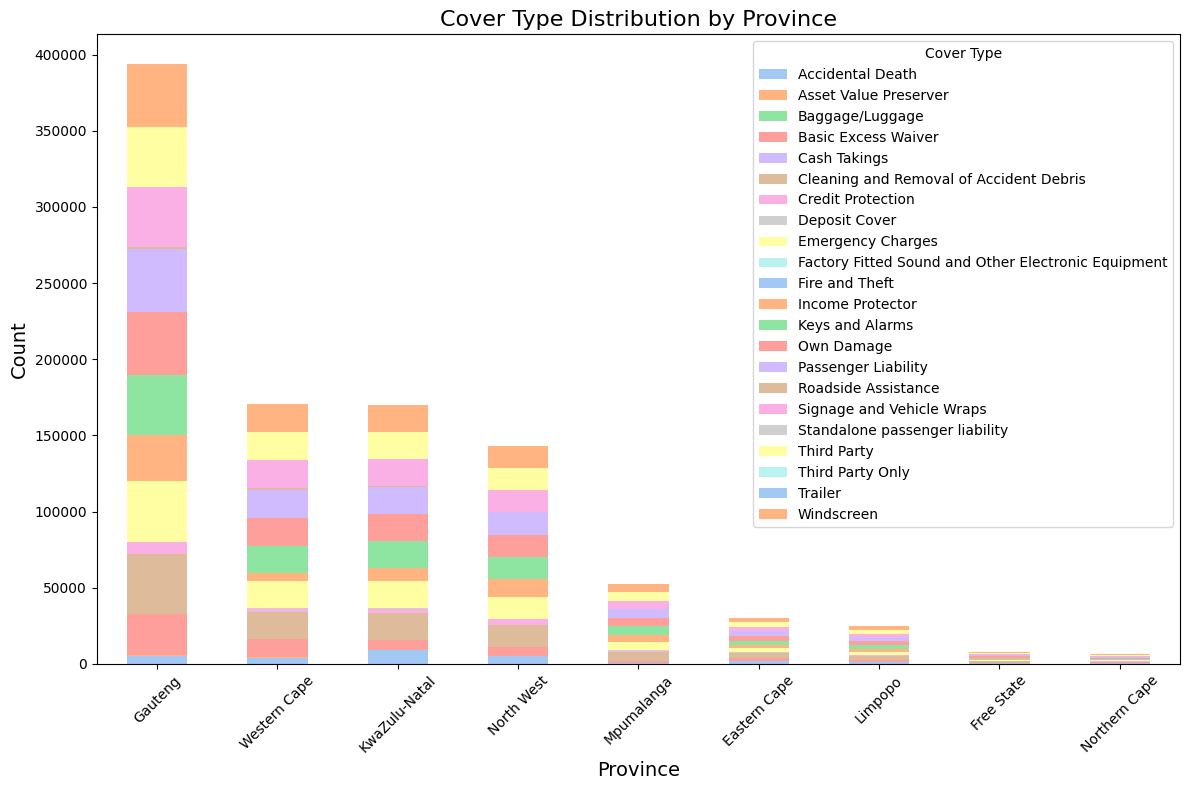

In [50]:
plotting.plot_cover_type_by_province()


**Observation**
- Gauteng has the highest count of insurance covers, indicating a larger market or higher insurance penetration in this province.
- Western Cape and KwaZulu-Natal also show significant numbers, suggesting these are key markets for insurance companies.

### Outlier detection

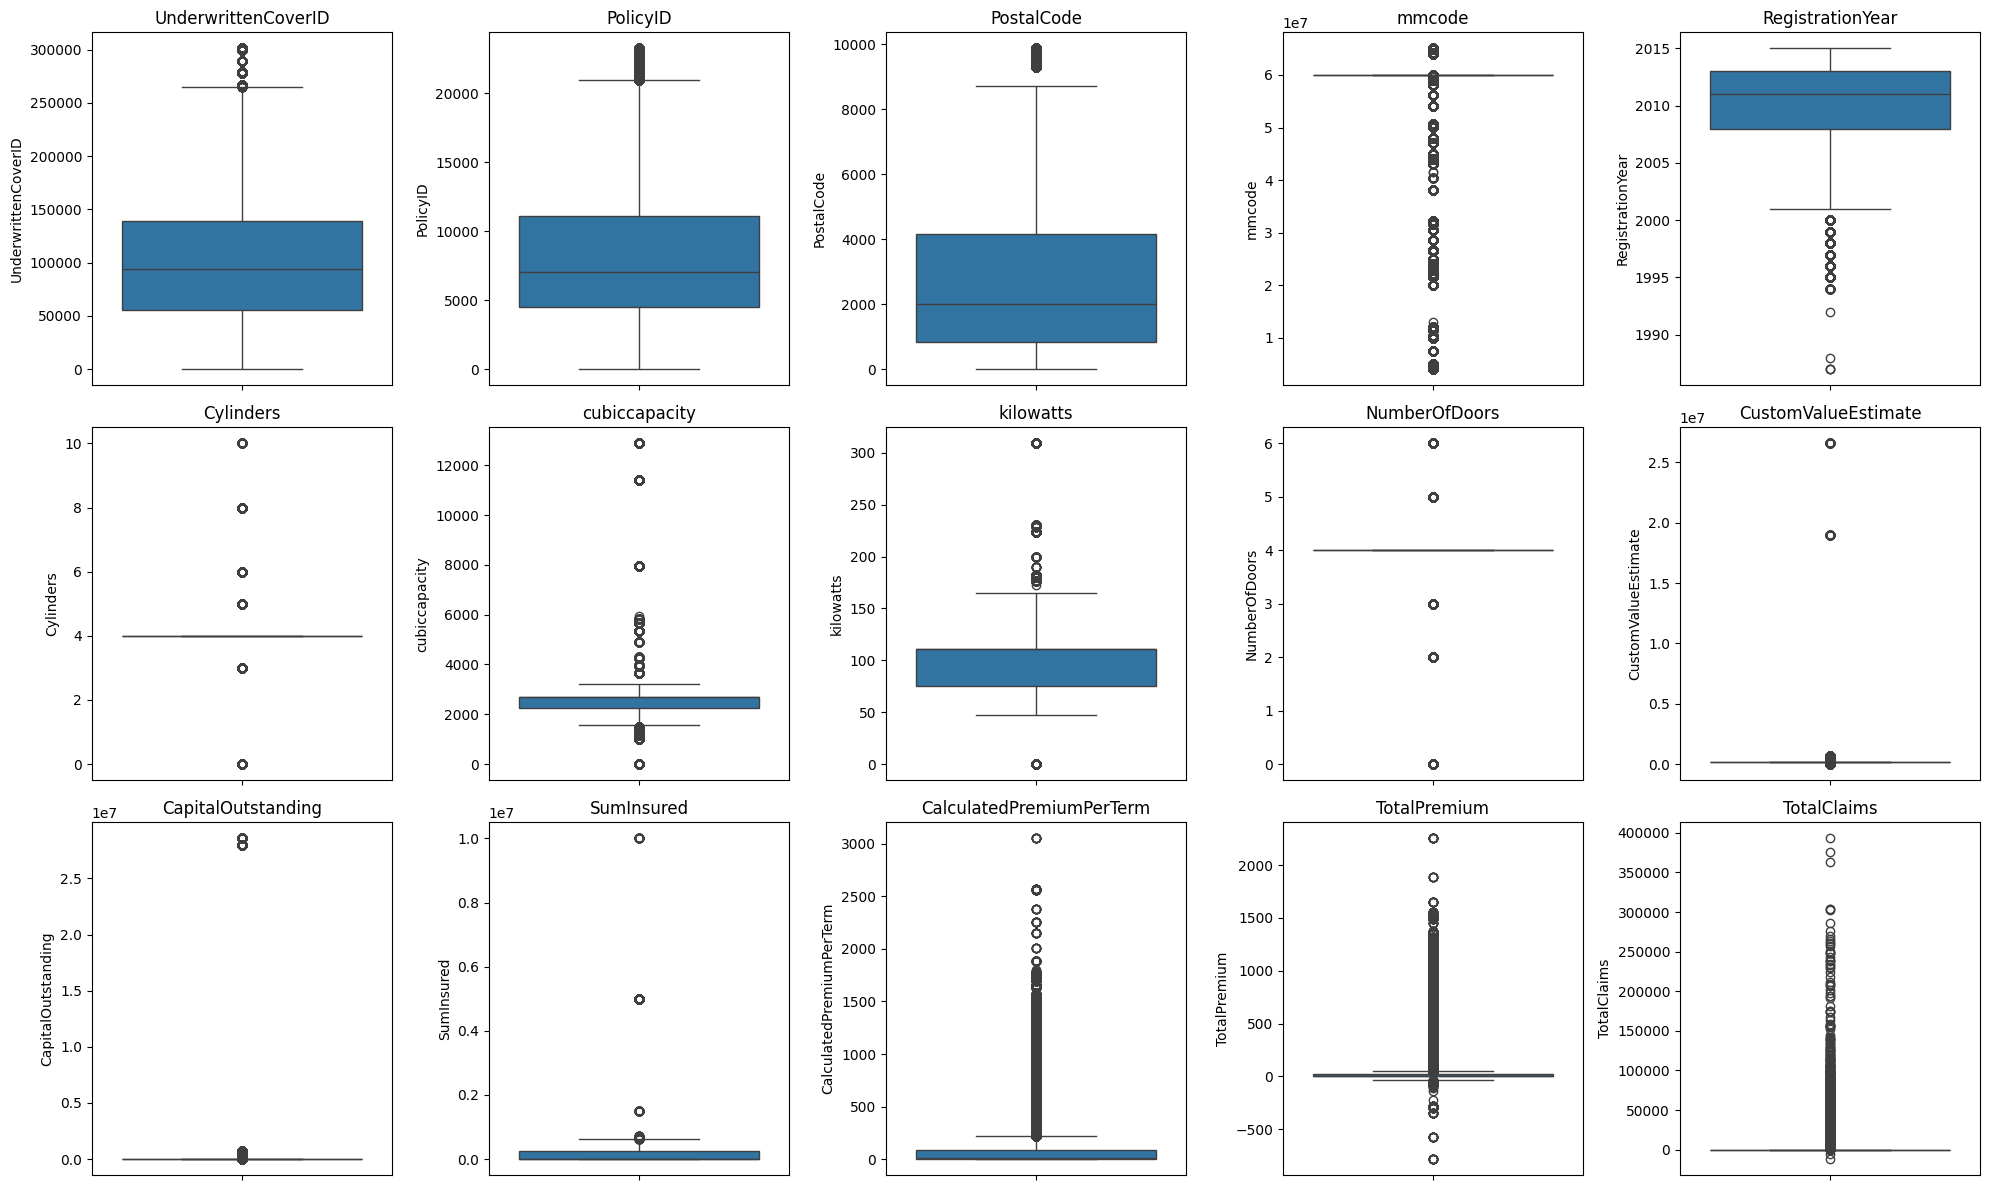

In [45]:
data_utils.visualize_outliers()

**Observation**
- The box plot show many outliers from the data. This show the data consists a wide range of values.

#### Total Premium vs TotalClaims by TransactionMonth 

<Axes: xlabel='TransactionMonth'>

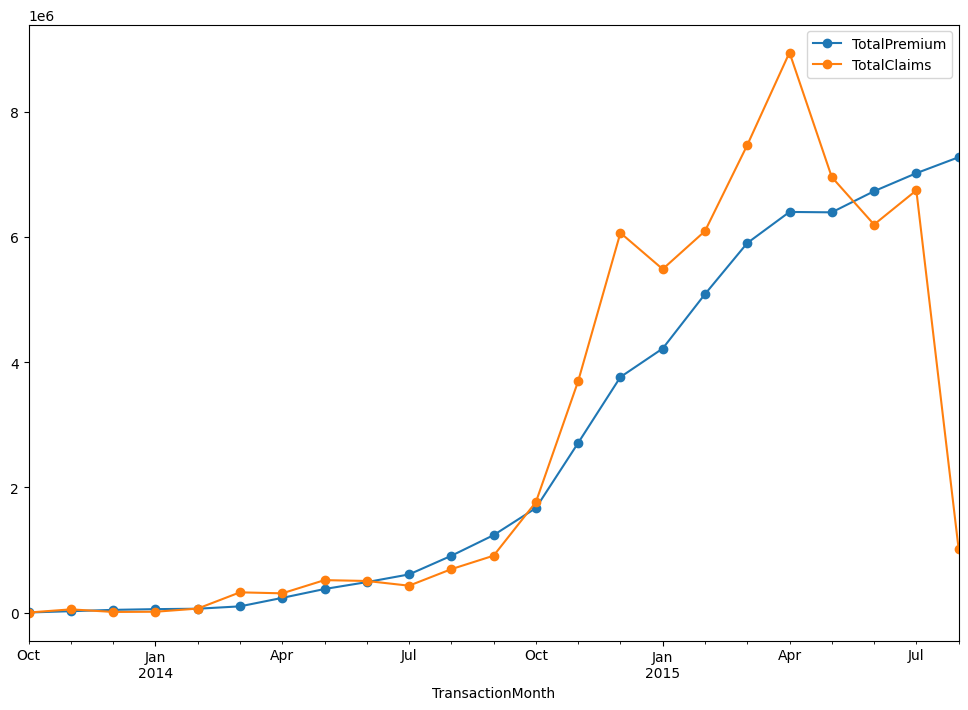

In [58]:
data.groupby('TransactionMonth')[['TotalPremium', 'TotalClaims']].sum().plot(figsize=(12, 8), marker='o')


**Observation**
- The spike in Total Claims followed by the decline may suggest a period of higher insurance claims (perhaps due to certain events or environmental factors), after which claims began to taper off.
- The continued rise in Total Premium despite the decline in claims could indicate higher insurance costs or an increase in the number of policies sold, even though claims have reduced.

**Next step**
- Investigate the cause of the sharp rise and subsequent decline in Total Claims around early 2015.
- Examine other variables or external factors during this period (e.g., economic conditions, regulatory changes, or major events) that might explain the trends in both Total Premium and Total Claims.

- Examineing the cause of the spike could help the marketing team to understand if it was replicable.

#### Distribution of Total Premiums by Vehicle Type

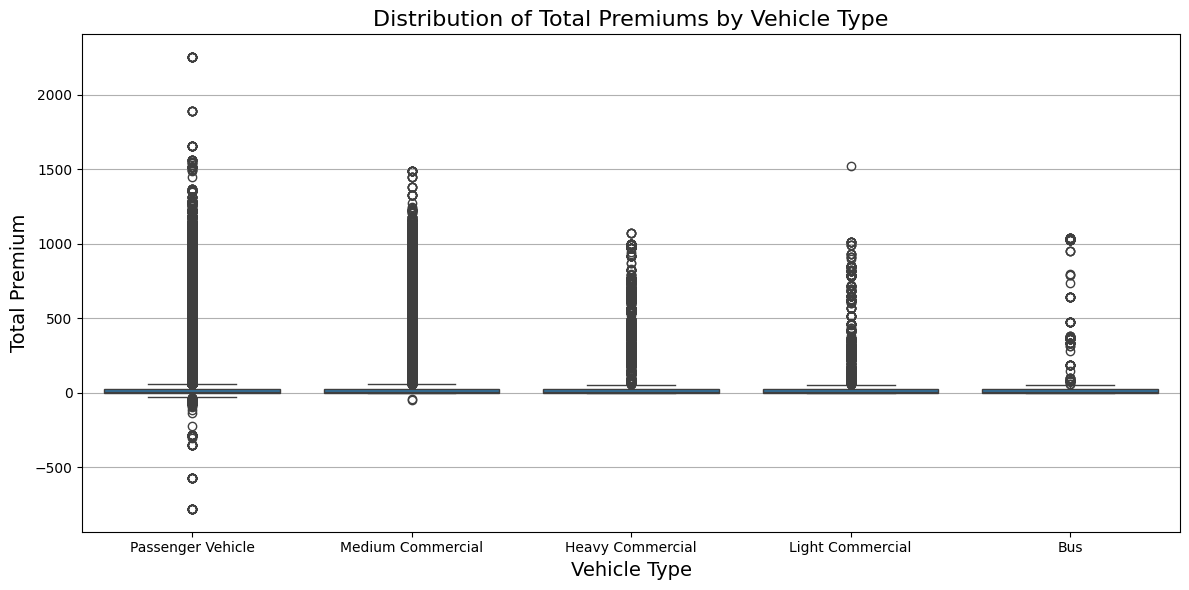

In [60]:
plotting.distribution_by_vehicle('TotalPremium')

**Observation**
- Passenger and Medium Commercial Vehicles seem to have a higher spread of premium values, as seen by the number of outliers, suggesting that premiums for these vehicle types vary significantly.
- There may be riskier or higher-value policies associated with Passenger and Medium Commercial vehicles, causing those outliers in premiums.
- Negative premiums need further investigation to understand their cause — they might represent rare adjustments, claims, or misreported data.

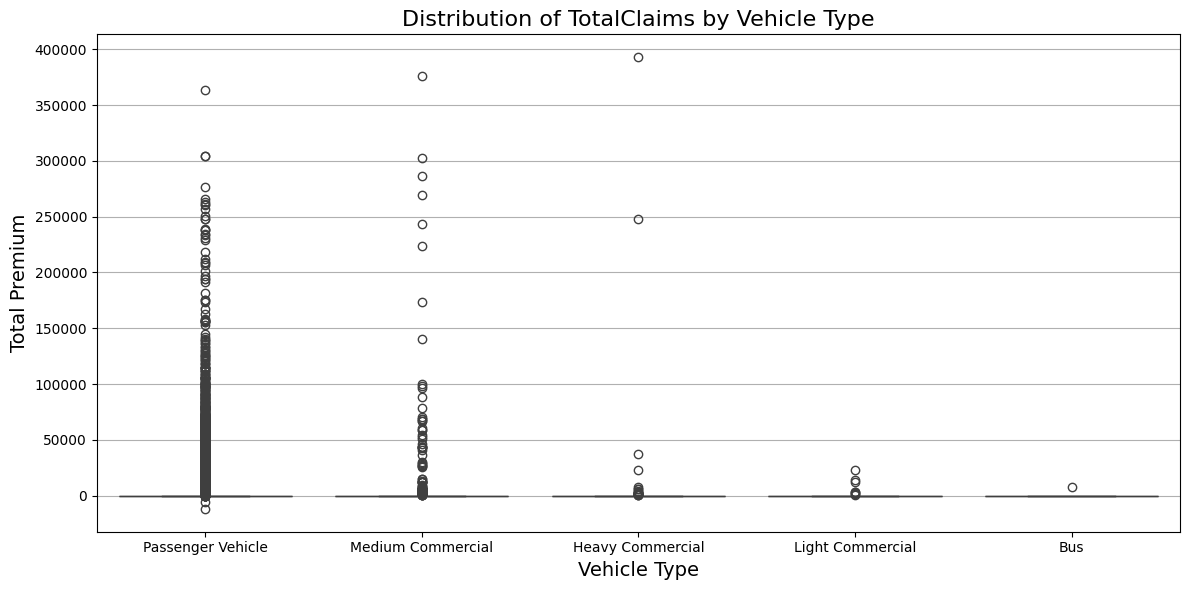

In [62]:
plotting.distribution_by_vehicle('TotalClaims')

**Observation**
- The significant outliers suggest that a small number of policies are very expensive, which could be due to factors such as high vehicle values, complex coverage, or claims history.


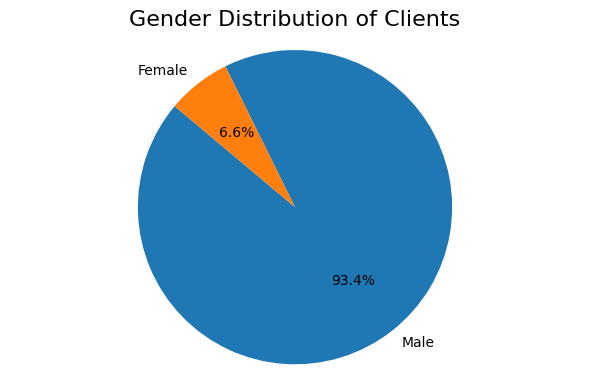

In [66]:
# Gender distribution
plotting.gender_distibution()


**Observaiton**
- There are a lot of male compared to females.